In [201]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn import preprocessing
from sklearn import datasets 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [2]:

dataframe_file0 = pd.read_csv('application_train0.csv')
dataframe_file1 = pd.read_csv('application_train1.csv')
dataframe_file2 = pd.read_csv('application_train2.csv')
dataframe_file3 = pd.read_csv('application_train3.csv')
dataframe_file4 = pd.read_csv('application_train4.csv')

listdf=[dataframe_file0,dataframe_file1,dataframe_file2,dataframe_file3,dataframe_file4]
train_df= pd.concat( listdf,axis=0)
train_df=train_df.iloc[:,1:]


In [3]:
test_df= pd.read_csv('application_train5.csv')
test_df=test_df.iloc[:,1:]

In [4]:
# the size of the dataframe

print("The dataframe shape is :",train_df.shape)

The dataframe shape is : (150000, 122)


In [5]:
print("Of the 122 The no. of numeric columns",len(train_df.select_dtypes(include=['int64','float64']).columns))
train_df.select_dtypes(include=['int64']).describe()

Of the 122 The no. of numeric columns 106


,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,186995.246367,0.081687,0.418173,-16022.583467,63600.189720,-2993.618193,0.999993,0.820473,0.199667,0.997967,...,0.000007,0.003513,0.002980,0.001127,0.009840,0.000233,0.008073,0.000600,0.000513,0.000313
std,50210.640888,0.273888,0.721222,4368.779131,141090.185226,1511.139528,0.002582,0.383794,0.399751,0.045047,...,0.002582,0.059169,0.054508,0.033547,0.098708,0.015274,0.089489,0.024488,0.022651,0.017699
min,100002.000000,0.000000,0.000000,-25201.000000,-17531.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,143440.500000,0.000000,0.000000,-19670.000000,-2752.000000,-4299.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,186982.500000,0.000000,0.000000,-15728.500000,-1214.000000,-3255.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,230504.250000,0.000000,1.000000,-12382.000000,-289.000000,-1714.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,273888.000000,1.000000,12.000000,-7676.000000,365243.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
print("Of the 122 The no. of categorical columns",len(train_df.select_dtypes(include=['object']).columns))
train_df.select_dtypes(include=['object']).describe()

Of the 122 The no. of categorical columns 16


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,150000,150000,150000,150000,149386,150000,150000,150000,150000,102919,150000,150000,47439,74579,73616,78757
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,135737,98828,99075,103969,121219,77613,106648,96071,133161,26938,26129,33345,36050,73290,32013,77654


In [7]:
cols=train_df.columns.tolist()
bi=[]
for i in cols:
    num_uniq=len(train_df[i].unique().tolist())
    if num_uniq==2:
        print(i,train_df[i].unique().tolist())
        bi.append(i)

TARGET [1, 0]
NAME_CONTRACT_TYPE ['Cash loans', 'Revolving loans']
FLAG_OWN_CAR ['N', 'Y']
FLAG_OWN_REALTY ['Y', 'N']
FLAG_MOBIL [1, 0]
FLAG_EMP_PHONE [1, 0]
FLAG_WORK_PHONE [0, 1]
FLAG_CONT_MOBILE [1, 0]
FLAG_PHONE [1, 0]
FLAG_EMAIL [0, 1]
REG_REGION_NOT_LIVE_REGION [0, 1]
REG_REGION_NOT_WORK_REGION [0, 1]
LIVE_REGION_NOT_WORK_REGION [0, 1]
REG_CITY_NOT_LIVE_CITY [0, 1]
REG_CITY_NOT_WORK_CITY [0, 1]
LIVE_CITY_NOT_WORK_CITY [0, 1]
FLAG_DOCUMENT_2 [0, 1]
FLAG_DOCUMENT_3 [1, 0]
FLAG_DOCUMENT_4 [0, 1]
FLAG_DOCUMENT_5 [0, 1]
FLAG_DOCUMENT_6 [0, 1]
FLAG_DOCUMENT_7 [0, 1]
FLAG_DOCUMENT_8 [0, 1]
FLAG_DOCUMENT_9 [0, 1]
FLAG_DOCUMENT_10 [0, 1]
FLAG_DOCUMENT_11 [0, 1]
FLAG_DOCUMENT_12 [0, 1]
FLAG_DOCUMENT_13 [0, 1]
FLAG_DOCUMENT_14 [0, 1]
FLAG_DOCUMENT_15 [0, 1]
FLAG_DOCUMENT_16 [0, 1]
FLAG_DOCUMENT_17 [0, 1]
FLAG_DOCUMENT_18 [0, 1]
FLAG_DOCUMENT_19 [0, 1]
FLAG_DOCUMENT_20 [0, 1]
FLAG_DOCUMENT_21 [0, 1]


In [8]:
cols2=train_df.select_dtypes(include=['object']).columns.tolist()
Ser=[]
for i in cols2:
    num_uniq=len(train_df[i].unique().tolist())
    if num_uniq>2:
        print(i,train_df[i].unique().tolist(),'\n')
        Ser.append(i)

CODE_GENDER ['M', 'F', 'XNA'] 

NAME_TYPE_SUITE ['Unaccompanied', 'Family', 'Spouse, partner', 'Children', 'Other_A', nan, 'Other_B', 'Group of people'] 

NAME_INCOME_TYPE ['Working', 'State servant', 'Commercial associate', 'Pensioner', 'Unemployed', 'Student', 'Businessman', 'Maternity leave'] 

NAME_EDUCATION_TYPE ['Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree'] 

NAME_FAMILY_STATUS ['Single / not married', 'Married', 'Civil marriage', 'Widow', 'Separated', 'Unknown'] 

NAME_HOUSING_TYPE ['House / apartment', 'Rented apartment', 'With parents', 'Municipal apartment', 'Office apartment', 'Co-op apartment'] 

OCCUPATION_TYPE ['Laborers', 'Core staff', 'Accountants', 'Managers', nan, 'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff', 'Private service staff', 'Medicine staff', 'Security staff', 'High skill tech staff', 'Waiters/barmen staff', 'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff', 'HR st

In [9]:
def missing_values(df):
    check_df = pd.concat([df.isnull().sum(), 100 * df.isnull().sum() / len(df)], axis=1)
    check_df.columns=['no_NANs','percentage_NANS']
    return check_df

check_df= missing_values(train_df)



In [10]:
check_df=check_df[check_df.no_NANs>0]
check_df.sort_values(by='percentage_NANS', inplace=True)

check_df

,no_NANs,percentage_NANS
CNT_FAM_MEMBERS,1,0.000667
DAYS_LAST_PHONE_CHANGE,1,0.000667
AMT_ANNUITY,8,0.005333
AMT_GOODS_PRICE,126,0.084000
EXT_SOURCE_2,328,0.218667
DEF_60_CNT_SOCIAL_CIRCLE,503,0.335333
OBS_60_CNT_SOCIAL_CIRCLE,503,0.335333
DEF_30_CNT_SOCIAL_CIRCLE,503,0.335333
OBS_30_CNT_SOCIAL_CIRCLE,503,0.335333
NAME_TYPE_SUITE,614,0.409333


* Less than 1% , the instances can be removed from the data. 

* The columns between 13- 30% can have the data replaced by median or mode 



In [11]:
rmna_cols = check_df.index[check_df.percentage_NANS<1].tolist()

for i in rmna_cols:
    train_df = train_df[pd.notnull(train_df[i])]



In [12]:
for i in rmna_cols:
    test_df = test_df[pd.notnull(test_df[i])]

In [13]:
check_df2= missing_values(train_df)
check_df2=check_df2[check_df2.no_NANs>0]
check_df2.sort_values(by='percentage_NANS', inplace=True)

print("The no. of columns with missing values now is: ",len(check_df2),\
      "\n The minimum percentage of NANs in a column:",check_df2.percentage_NANS.min(),\
     "\n The maximum percentage of NANs is:",check_df2.percentage_NANS.max())

The no. of columns with missing values now is:  57 
 The minimum percentage of NANs in a column: 13.40904348060236 
 The maximum percentage of NANs is: 69.93584608445698


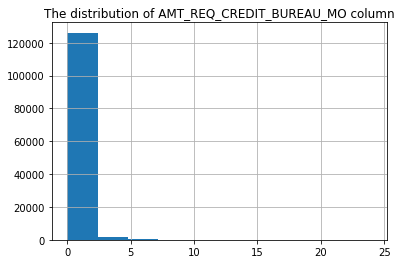

In [14]:
train_df.AMT_REQ_CREDIT_BUREAU_MON.hist()
plt.title("The distribution of AMT_REQ_CREDIT_BUREAU_MO column")
plt.show()

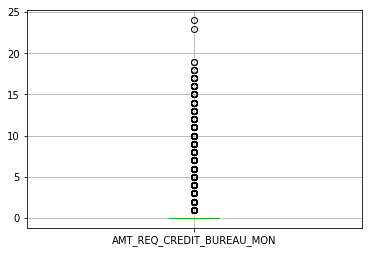

In [15]:
train_df.boxplot(['AMT_REQ_CREDIT_BUREAU_MON'])

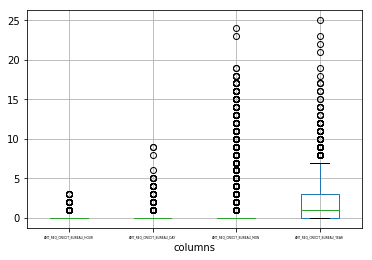

In [16]:
train_df.boxplot(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR'])
plt.xlabel('columns')
plt.xticks( fontsize = 3)
plt.show()


In [17]:
med=train_df['AMT_REQ_CREDIT_BUREAU_YEAR'].median()
med1=train_df['AMT_REQ_CREDIT_BUREAU_DAY'].median()
med2=train_df['AMT_REQ_CREDIT_BUREAU_MON'].median()
med3=train_df['AMT_REQ_CREDIT_BUREAU_HOUR'].median()
med4=train_df['AMT_REQ_CREDIT_BUREAU_WEEK'].median()
med5=train_df['AMT_REQ_CREDIT_BUREAU_QRT'].median()

In [18]:
train_df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(med, inplace=True)
train_df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(med1, inplace=True)
train_df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(med2, inplace=True)
train_df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(med3, inplace=True)
train_df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(med4, inplace=True)
train_df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(med5, inplace=True)

In [19]:
test_df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(med, inplace=True)
test_df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(med1, inplace=True)
test_df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(med2, inplace=True)
test_df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(med3, inplace=True)
test_df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(med4, inplace=True)
test_df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(med5, inplace=True)

In [20]:
check_df3= missing_values(train_df)
check_df3=check_df3[check_df3.no_NANs>0]
check_df3.sort_values(by='percentage_NANS', inplace=True)

print("The no. of columns with missing values now is: ",len(check_df3),\
      "\n The minimum percentage of NANs in a column:",check_df3.percentage_NANS.min(),\
     "\n The maximum percentage of NANs is:",check_df3.percentage_NANS.max())

The no. of columns with missing values now is:  51 
 The minimum percentage of NANs in a column: 19.74365360924678 
 The maximum percentage of NANs is: 69.93584608445698


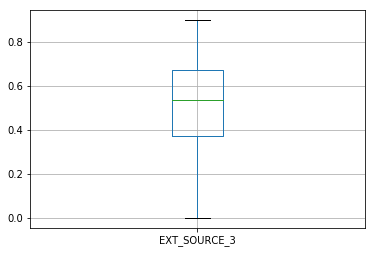

In [21]:
#EXT_SOURCE_3

train_df.boxplot(['EXT_SOURCE_3'])

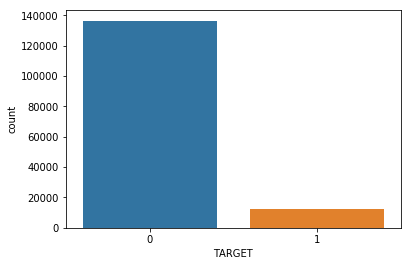

ratio of 1's to total: 0.08200661061333298


In [22]:
# RARE EVENT MODELLING
sns.countplot(train_df['TARGET'],label="Count")
plt.show()
print("ratio of 1's to total:",len(train_df[train_df['TARGET']==1])/len(train_df['TARGET']))

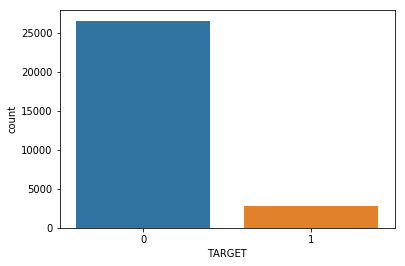

ratio of 1's to total: 0.0939684271540114


In [23]:
check_na_df= train_df[train_df['EXT_SOURCE_3'].isnull()==True]
sns.countplot(check_na_df['TARGET'],label="Count")
plt.show()

print("ratio of 1's to total:",len(check_na_df[check_na_df['TARGET']==1])/len(check_na_df['TARGET']))

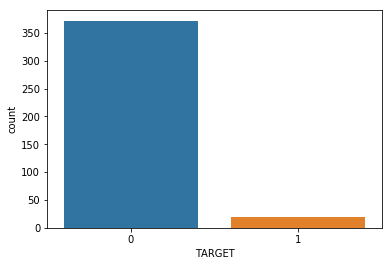

ratio of 1's to total: 0.05102040816326531


In [24]:
med_ext3= train_df['EXT_SOURCE_3'].median()

check_median_df= train_df[train_df['EXT_SOURCE_3']==med_ext3]
sns.countplot(check_median_df['TARGET'],label="Count")
plt.show()
print("ratio of 1's to total:",len(check_median_df[check_median_df['TARGET']==1])/len(check_median_df['TARGET']))


In [25]:
train_df['EXT_SOURCE_3'].fillna(med_ext3, inplace=True)

In [26]:
test_df['EXT_SOURCE_3'].fillna(med_ext3, inplace=True)

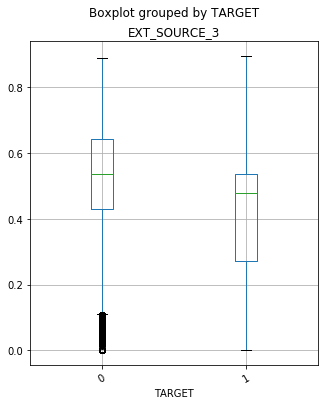

In [27]:
train_df.boxplot('EXT_SOURCE_3','TARGET',rot = 30,figsize=(5,6))

In [28]:
check_df4= missing_values(train_df)
check_df4=check_df4[check_df4.no_NANs>0]
check_df4.sort_values(by='percentage_NANS', inplace=True)

print("The no. of columns with missing values now is: ",len(check_df4),\
      "\n The minimum percentage of NANs in a column:",check_df4.percentage_NANS.min(),\
     "\n The maximum percentage of NANs is:",check_df4.percentage_NANS.max())

The no. of columns with missing values now is:  50 
 The minimum percentage of NANs in a column: 31.380217975213565 
 The maximum percentage of NANs is: 69.93584608445698


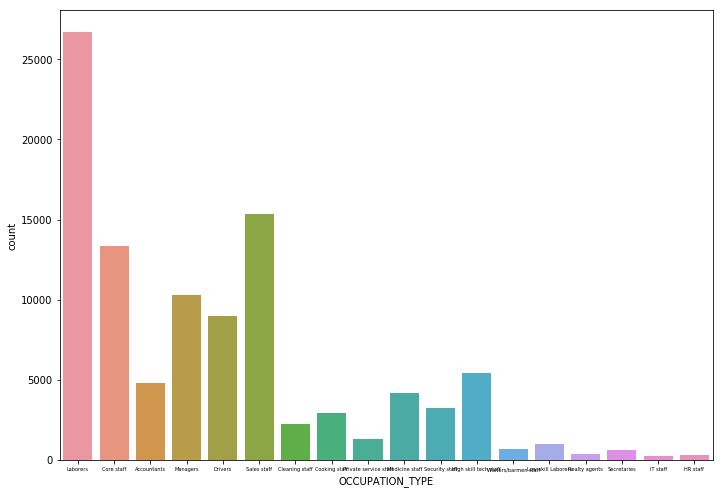

In [29]:
fig, ax = plt.subplots()
sns.countplot(train_df['OCCUPATION_TYPE'],label="Count")
fig.set_size_inches(11.7, 8.27)
plt.xticks( fontsize = 5)
plt.show()

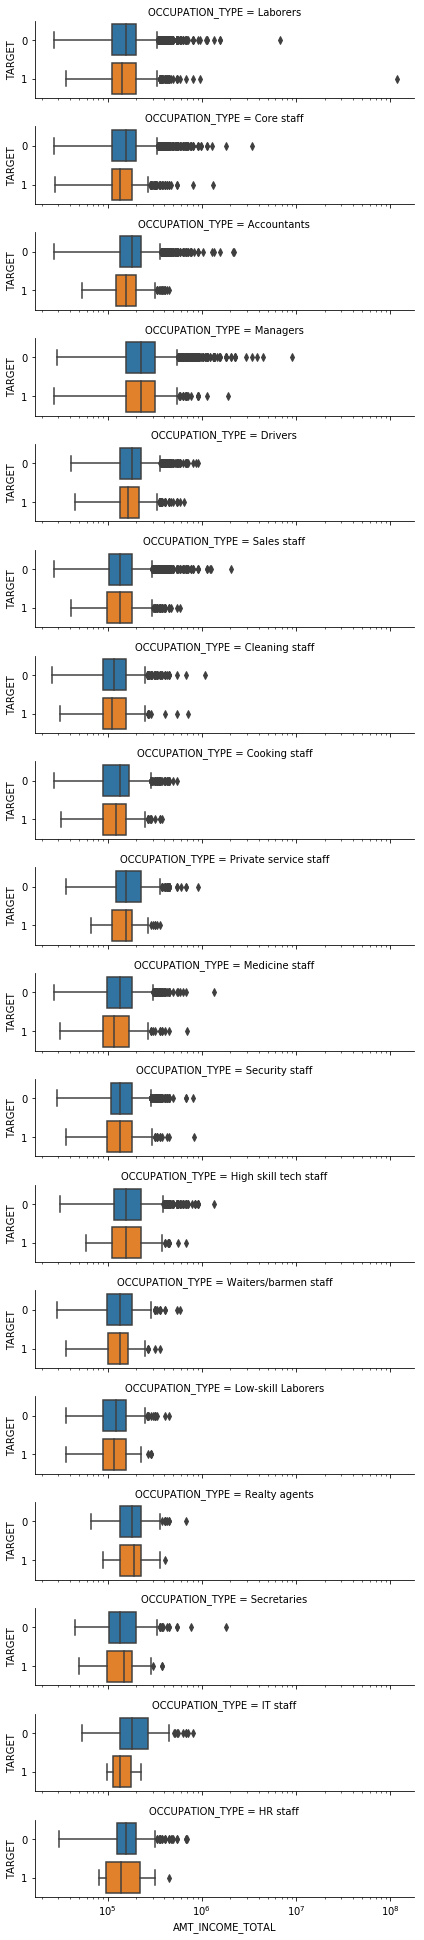

In [30]:
g = sns.catplot(x="AMT_INCOME_TOTAL", y="TARGET", row="OCCUPATION_TYPE",
                kind="box", orient="h", height=1.5, aspect=4,
                data=train_df)

g.set(xscale="log")
plt.show()

In [31]:
df_1=train_df.groupby('OCCUPATION_TYPE')['OCCUPATION_TYPE'].count()
df_2=train_df.groupby('OCCUPATION_TYPE')['TARGET'].sum()
df_occup_tar = pd.concat([df_1,df_2], axis=1)
df_occup_tar.columns=['OCCUPATION_TYPE_total','TARGETis1']
sum_total=df_occup_tar.OCCUPATION_TYPE_total.sum()
df_occup_tar['Percentage_occ']= df_occup_tar.OCCUPATION_TYPE_total*100/sum_total
df_occup_tar['Percentage_default']= df_occup_tar.TARGETis1*100/df_occup_tar.OCCUPATION_TYPE_total
df_occup_tar
#df.groupby('a')['a'].transform('count')

,OCCUPATION_TYPE_total,TARGETis1,Percentage_occ,Percentage_default
OCCUPATION_TYPE,,,,
Accountants,4784,245,4.693233,5.121237
Cleaning staff,2221,217,2.178861,9.770374
Cooking staff,2918,311,2.862637,10.657985
Core staff,13327,873,13.074146,6.550612
Drivers,8969,987,8.798831,11.004571
HR staff,279,18,0.273707,6.451613
High skill tech staff,5435,342,5.331881,6.292548
IT staff,247,14,0.242314,5.668016
Laborers,26719,2914,26.212059,10.906097


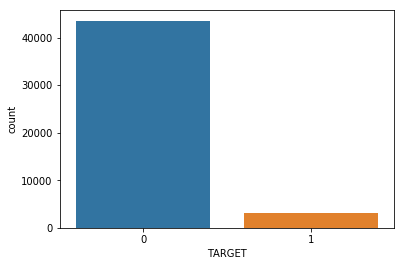

ratio of 1's to total len: 0.06603024777432157
3078 no. of instances
ratio of 1's when occ is null to total no. of 1s : 0.2526678706287966


In [32]:
check_occupation_na= train_df[train_df.OCCUPATION_TYPE.isnull()==True ]
sns.countplot(check_occupation_na['TARGET'],label="Count")
plt.show()
print("ratio of 1's to total len:",len(check_occupation_na[check_occupation_na['TARGET']==1])/len(check_occupation_na['TARGET']))
print(len(check_occupation_na[check_occupation_na['TARGET']==1]),"no. of instances")
print("ratio of 1's when occ is null to total no. of 1s :",\
      len(check_occupation_na[check_occupation_na['TARGET']==1])/len(train_df[train_df.TARGET==1]))

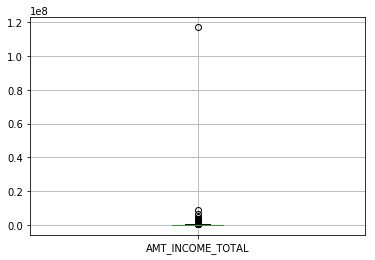

In [33]:
train_df.boxplot('AMT_INCOME_TOTAL')

In [34]:
train_df.AMT_INCOME_TOTAL.sort_values(ascending=False)[:10]

12840    117000000.0
17768      9000000.0
11127      6750000.0
13006      4500000.0
20216      3825000.0
19645      3600000.0
26026      3375000.0
22846      3375000.0
11007      3150000.0
17926      2930026.5
Name: AMT_INCOME_TOTAL, dtype: float64

In [35]:
train_df=train_df[train_df.AMT_INCOME_TOTAL!=117000000.0]

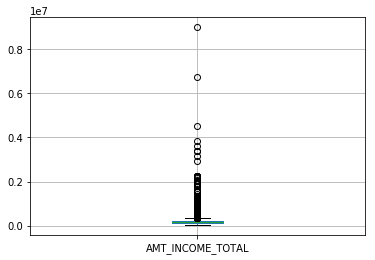

In [36]:
train_df.boxplot('AMT_INCOME_TOTAL')

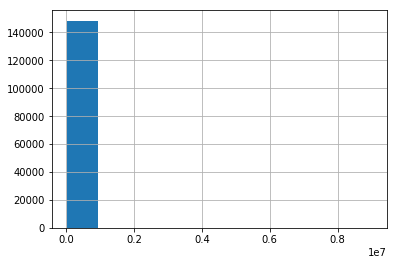

In [37]:
train_df.AMT_INCOME_TOTAL.hist()

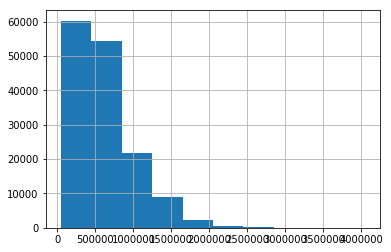

In [38]:
#AMT_CREDIT
train_df.AMT_CREDIT.hist()

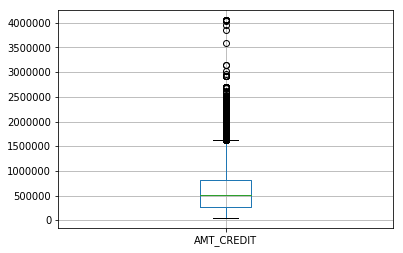

In [39]:
train_df.boxplot('AMT_CREDIT')

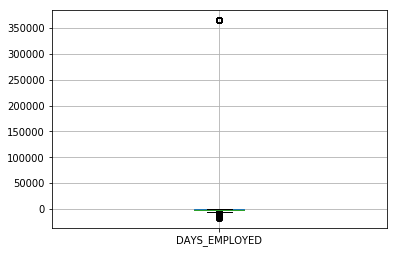

In [40]:
train_df.boxplot('DAYS_EMPLOYED')

In [41]:
train_df.DAYS_EMPLOYED.sort_values(ascending=False)[:10]

14994    365243
12603    365243
12532    365243
19724    365243
12527    365243
7257     365243
7258     365243
12523    365243
12516    365243
12514    365243
Name: DAYS_EMPLOYED, dtype: int64

In [42]:
np.unique(train_df.loc[train_df.DAYS_EMPLOYED>0,['DAYS_EMPLOYED','OCCUPATION_TYPE']])

array([365243, nan, 365243, ..., nan, 365243, nan], dtype=object)

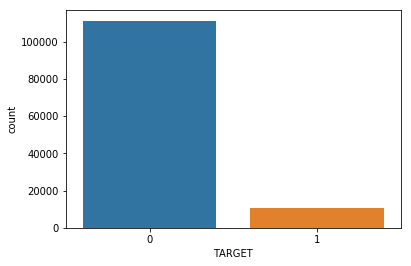

ratio of 1's to total: 0.08786511322612406


In [43]:
train_check=train_df.loc[train_df.DAYS_EMPLOYED<0,:]
sns.countplot(train_check['TARGET'],label="Count")
plt.show()
print("ratio of 1's to total:",len(train_check[train_check['TARGET']==1])/len(train_check['TARGET']))

In [44]:
train_df=train_df.loc[train_df.DAYS_EMPLOYED<0,:]

In [45]:
test_df=test_df.loc[test_df.DAYS_EMPLOYED<0,:]

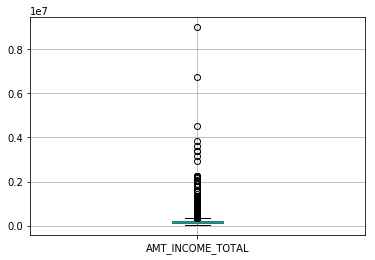

In [46]:
train_df.boxplot('AMT_INCOME_TOTAL')

In [47]:
#adding additional features

train_df['income_fm']= train_df['AMT_INCOME_TOTAL']/(train_df['CNT_FAM_MEMBERS']+1)
test_df['income_fm']= test_df['AMT_INCOME_TOTAL']/(test_df['CNT_FAM_MEMBERS']+1)

train_df['days_emp']= train_df['DAYS_EMPLOYED']/train_df['DAYS_BIRTH']
test_df['days_emp']= test_df['DAYS_EMPLOYED']/test_df['DAYS_BIRTH']


train_df['ann_nr'] = train_df['AMT_CREDIT']/train_df['AMT_ANNUITY']
test_df['ann_nr'] = test_df['AMT_CREDIT']/test_df['AMT_ANNUITY']

In [48]:
def Winsorize_check(data):
    quantiles = data.quantile([0.01, 0.99])
    q_01 = quantiles.loc[0.01]
    q_99 = quantiles.loc[0.99]

    out = np.where(data.values <= q_01,q_01, np.where(data >= q_99, q_99, data))
    return out

In [49]:
colstotreat=['AMT_CREDIT','AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_GOODS_PRICE']
for i in colstotreat:
    train_df[i]=Winsorize_check(train_df[i])

In [50]:
colstotreat=['AMT_CREDIT','AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_GOODS_PRICE']
for i in colstotreat:
    test_df[i]=Winsorize_check(test_df[i])

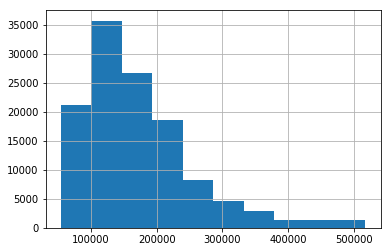

In [51]:
train_df.AMT_INCOME_TOTAL.hist() 

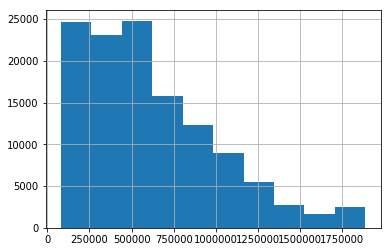

In [52]:
train_df.AMT_CREDIT.hist() 

In [53]:
train_df['YEARS_EMPLOYED']=train_df.DAYS_EMPLOYED/-365
train_df.YEARS_EMPLOYED.sort_values(ascending=False)[:15]

5191     48.030137
22446    47.041096
23265    46.956164
9095     46.161644
23266    45.619178
2757     45.309589
5681     45.202740
10429    45.191781
18004    45.073973
10082    45.010959
14721    44.863014
18932    44.835616
1283     44.832877
20174    44.789041
25957    44.775342
Name: YEARS_EMPLOYED, dtype: float64

In [54]:
test_df['YEARS_EMPLOYED']=test_df.DAYS_EMPLOYED/-365

In [55]:
train_df.drop('DAYS_EMPLOYED',axis=1, inplace=True)

In [56]:
test_df.drop('DAYS_EMPLOYED',axis=1, inplace=True)

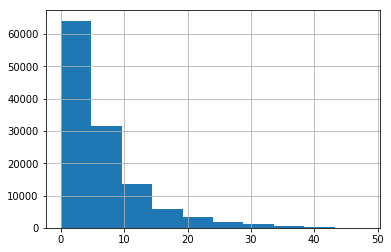

In [57]:
train_df['YEARS_EMPLOYED'].hist()
plt.show()

In [58]:
check_df5= missing_values(train_df)
check_df5=check_df5[check_df5.no_NANs>0]
check_df5.sort_values(by='percentage_NANS', inplace=True)

print("The no. of columns with missing values now is: ",len(check_df5),\
      "\n The minimum percentage of NANs in a column:",check_df5.percentage_NANS.min(),\
     "\n The maximum percentage of NANs is:",check_df5.percentage_NANS.max())

The no. of columns with missing values now is:  50 
 The minimum percentage of NANs in a column: 16.36691828027568 
 The maximum percentage of NANs is: 69.84164752215294


In [59]:
check_df5

,no_NANs,percentage_NANS
OCCUPATION_TYPE,19948,16.366918
EMERGENCYSTATE_MODE,57692,47.335084
TOTALAREA_MODE,58772,48.221201
YEARS_BEGINEXPLUATATION_MEDI,59376,48.716771
YEARS_BEGINEXPLUATATION_AVG,59376,48.716771
YEARS_BEGINEXPLUATATION_MODE,59376,48.716771
FLOORSMAX_MEDI,60588,49.711191
FLOORSMAX_AVG,60588,49.711191
FLOORSMAX_MODE,60588,49.711191
HOUSETYPE_MODE,61100,50.131277


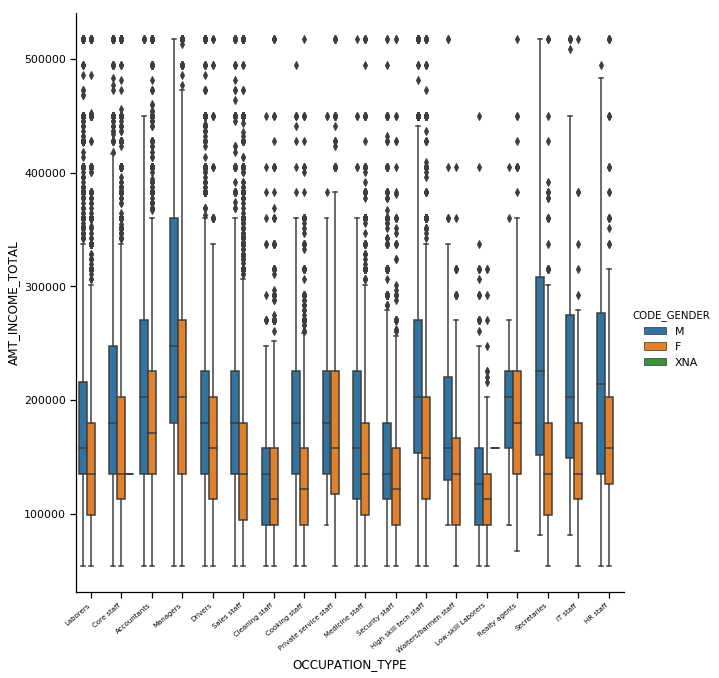

In [60]:
sns.set_context("notebook")
ax1=sns.catplot(x="OCCUPATION_TYPE", y="AMT_INCOME_TOTAL", hue="CODE_GENDER", kind="box", data=train_df,height=9)
ax1.set_xticklabels( rotation=40, ha="right",fontsize=7)

In [61]:
#train_df.groupby(['CODE_GENDER','NAME_EDUCATION_TYPE','OCCUPATION_TYPE'],as_index=False).agg({'AMT_INCOME_TOTAL':np.median ,'SK_ID_CURR':'count'})

In [62]:
#train_df.groupby(['OCCUPATION_TYPE'],as_index=False).agg({'AMT_INCOME_TOTAL':np.median ,'SK_ID_CURR':'count'}).sort_values(by='AMT_INCOME_TOTAL',ascending=False)

In [63]:
colstodrop= check_df5.index.values.tolist()
colstodrop.remove('EXT_SOURCE_1')


In [64]:
train_df= train_df.drop(colstodrop,axis=1)

In [65]:
test_df= test_df.drop(colstodrop,axis=1)

In [66]:
test_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', '

In [67]:
med_ext1= train_df['EXT_SOURCE_1'].median()
train_df['EXT_SOURCE_1'].fillna(med_ext1, inplace=True)
test_df['EXT_SOURCE_1'].fillna(med_ext1, inplace=True)

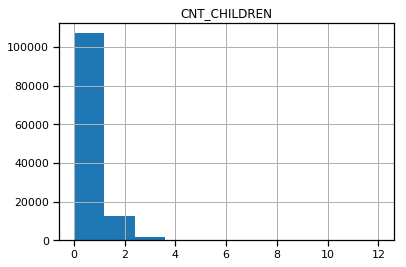

In [68]:
train_df.hist('CNT_CHILDREN')
plt.show()

In [69]:
train_df.CNT_CHILDREN.sort_values(ascending=False)[:5]

20948    12
4545     11
12585    10
23881     9
12615     8
Name: CNT_CHILDREN, dtype: int64

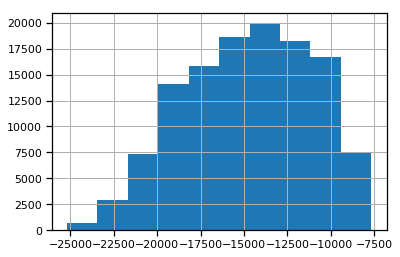

In [70]:
train_df.DAYS_BIRTH.hist()

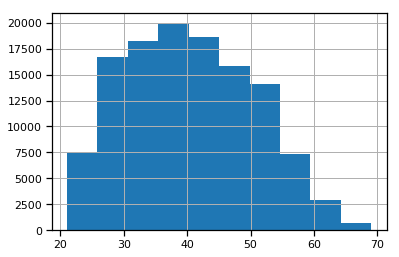

In [71]:
train_df['YEARS_BIRTH']=train_df.DAYS_BIRTH/-365
train_df['YEARS_BIRTH'].hist()
plt.show()

In [72]:
test_df['YEARS_BIRTH']=test_df.DAYS_BIRTH/-365


In [73]:
print("Range of age:",train_df['YEARS_BIRTH'].min(),train_df['YEARS_BIRTH'].max())

Range of age: 21.03013698630137 69.04109589041096


In [74]:
train_df[train_df['YEARS_BIRTH']<22].sort_values(by='YEARS_EMPLOYED',ascending=False)[:10]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,income_fm,days_emp,ann_nr,YEARS_EMPLOYED,YEARS_BIRTH
12229,183763,0,Cash loans,M,Y,N,0,69300.0,967500.0,26604.0,...,0.0,0.0,0.0,0.0,1.0,34650.0,0.178934,36.366712,3.909589,21.849315
24713,128746,0,Revolving loans,F,N,N,0,112500.0,202500.0,10125.0,...,0.0,0.0,0.0,0.0,1.0,56250.0,0.177022,20.000000,3.879452,21.915068
756,135697,1,Revolving loans,F,Y,Y,1,157500.0,135000.0,6750.0,...,0.0,0.0,1.0,1.0,1.0,39375.0,0.174830,20.000000,3.813699,21.813699
18888,191446,0,Cash loans,F,N,Y,0,157500.0,130500.0,12199.5,...,0.0,0.0,0.0,0.0,0.0,78750.0,0.172687,10.697160,3.758904,21.767123
7522,213233,0,Cash loans,F,N,N,0,180000.0,148500.0,14013.0,...,0.0,0.0,0.0,0.0,1.0,90000.0,0.170796,10.597303,3.739726,21.895890
10880,217128,0,Revolving loans,F,N,Y,0,112500.0,180000.0,9000.0,...,0.0,0.0,0.0,2.0,0.0,56250.0,0.170655,20.000000,3.731507,21.865753
23052,265865,1,Revolving loans,F,N,Y,0,112500.0,180000.0,9000.0,...,0.0,0.0,0.0,0.0,3.0,37500.0,0.169695,20.000000,3.709589,21.860274
14012,185830,1,Revolving loans,M,N,N,0,382500.0,1350000.0,67500.0,...,0.0,0.0,0.0,0.0,1.0,191250.0,0.168304,20.000000,3.660274,21.747945
8406,214250,0,Cash loans,F,N,N,0,96804.0,1078200.0,29781.0,...,0.0,0.0,0.0,0.0,1.0,32268.0,0.166960,36.204291,3.643836,21.824658
61,100072,0,Cash loans,M,N,N,0,180000.0,1080000.0,44118.0,...,0.0,0.0,0.0,0.0,4.0,90000.0,0.167447,24.479804,3.627397,21.663014


In [75]:
train_df.drop('DAYS_BIRTH',axis=1,inplace=True)

In [76]:
test_df.drop('DAYS_BIRTH',axis=1,inplace=True)

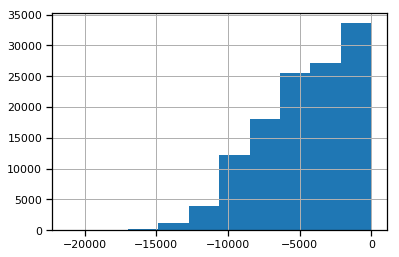

In [77]:
train_df.DAYS_REGISTRATION.hist()

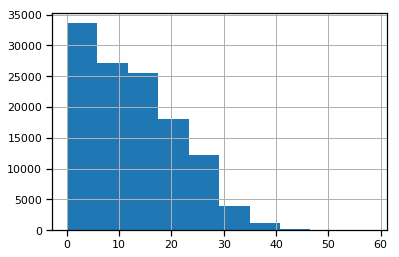

In [78]:
train_df['YEAR_REGISTRATION']=train_df.DAYS_REGISTRATION/-365
train_df.YEAR_REGISTRATION.hist()

In [79]:
test_df['YEAR_REGISTRATION']=test_df.DAYS_REGISTRATION/-365

In [80]:
train_df.drop('DAYS_REGISTRATION',axis=1,inplace=True)

In [81]:
test_df.drop('DAYS_REGISTRATION',axis=1,inplace=True)

In [82]:
train_df.dtypes.value_counts()

int64      39
float64    26
object     11
dtype: int64

In [83]:
cols=train_df.select_dtypes(include=['int64']).columns.tolist()
bi=[]
for i in cols:
    num_uniq=len(train_df[i].unique().tolist())
    if num_uniq==2:
        print(i,train_df[i].unique().tolist())
        bi.append(i)

TARGET [1, 0]
FLAG_EMP_PHONE [1, 0]
FLAG_WORK_PHONE [0, 1]
FLAG_CONT_MOBILE [1, 0]
FLAG_PHONE [1, 0]
FLAG_EMAIL [0, 1]
REG_REGION_NOT_LIVE_REGION [0, 1]
REG_REGION_NOT_WORK_REGION [0, 1]
LIVE_REGION_NOT_WORK_REGION [0, 1]
REG_CITY_NOT_LIVE_CITY [0, 1]
REG_CITY_NOT_WORK_CITY [0, 1]
LIVE_CITY_NOT_WORK_CITY [0, 1]
FLAG_DOCUMENT_2 [0, 1]
FLAG_DOCUMENT_3 [1, 0]
FLAG_DOCUMENT_4 [0, 1]
FLAG_DOCUMENT_5 [0, 1]
FLAG_DOCUMENT_6 [0, 1]
FLAG_DOCUMENT_7 [0, 1]
FLAG_DOCUMENT_8 [0, 1]
FLAG_DOCUMENT_9 [0, 1]
FLAG_DOCUMENT_10 [0, 1]
FLAG_DOCUMENT_11 [0, 1]
FLAG_DOCUMENT_12 [0, 1]
FLAG_DOCUMENT_13 [0, 1]
FLAG_DOCUMENT_14 [0, 1]
FLAG_DOCUMENT_15 [0, 1]
FLAG_DOCUMENT_16 [0, 1]
FLAG_DOCUMENT_17 [0, 1]
FLAG_DOCUMENT_18 [0, 1]
FLAG_DOCUMENT_19 [0, 1]
FLAG_DOCUMENT_20 [0, 1]
FLAG_DOCUMENT_21 [0, 1]


In [84]:
print("Number of binary int variables",len(bi))

Number of binary int variables 32


In [85]:
cols=train_df.select_dtypes(include=['int64']).columns.tolist()
ints=[]
for i in cols:
    num_uniq=len(train_df[i].unique().tolist())
    if num_uniq>2:
        print(i,num_uniq)
        ints.append(i)

SK_ID_CURR 121880
CNT_CHILDREN 13
DAYS_ID_PUBLISH 6009
REGION_RATING_CLIENT 3
REGION_RATING_CLIENT_W_CITY 3
HOUR_APPR_PROCESS_START 24


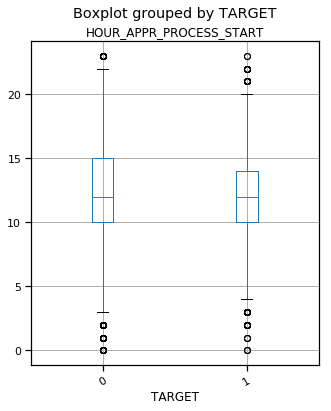

In [86]:
train_df.boxplot('HOUR_APPR_PROCESS_START','TARGET',rot = 30,figsize=(5,6))

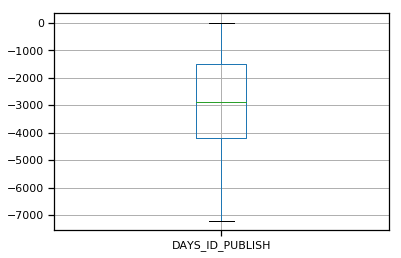

In [87]:
# DAYS_ID_PUBLISH
train_df.boxplot('DAYS_ID_PUBLISH')

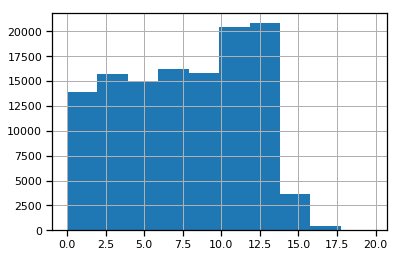

In [88]:
train_df['YEARS_ID_PUBLISH']=train_df['DAYS_ID_PUBLISH']/-365
train_df['YEARS_ID_PUBLISH'].hist()
plt.show()

In [89]:
test_df['YEARS_ID_PUBLISH']=test_df['DAYS_ID_PUBLISH']/-365

In [90]:
train_df.drop('DAYS_ID_PUBLISH',axis=1,inplace=True)

In [91]:
test_df.drop('DAYS_ID_PUBLISH',axis=1,inplace=True)

In [92]:
objcols=train_df.select_dtypes(include=['object']).columns.tolist()
objcols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [93]:
for i in objcols:
    print(i,train_df[i].unique())

NAME_CONTRACT_TYPE ['Cash loans' 'Revolving loans']
CODE_GENDER ['M' 'F' 'XNA']
FLAG_OWN_CAR ['N' 'Y']
FLAG_OWN_REALTY ['Y' 'N']
NAME_TYPE_SUITE ['Unaccompanied' 'Family' 'Spouse, partner' 'Other_A' 'Children'
 'Group of people' 'Other_B']
NAME_INCOME_TYPE ['Working' 'State servant' 'Commercial associate' 'Student' 'Pensioner'
 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated']
NAME_HOUSING_TYPE ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
WEEKDAY_APPR_PROCESS_START ['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY']
ORGANIZATION_TYPE ['Business Entity Type 3' 'School' 'Government' 'Religion' 'Other'
 'Electricity' 'Medicine' 'Business Entity Type 2' 'Self-employed'
 'Transport: type 2' 'Construc

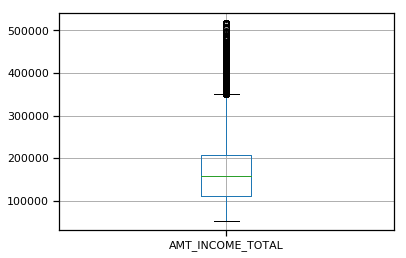

AMT_INCOME_TOTAL 1216


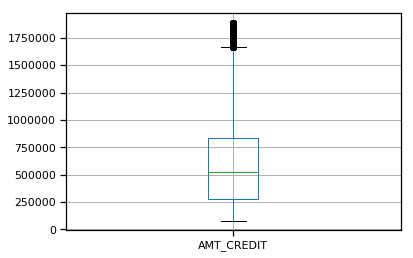

AMT_CREDIT 4155


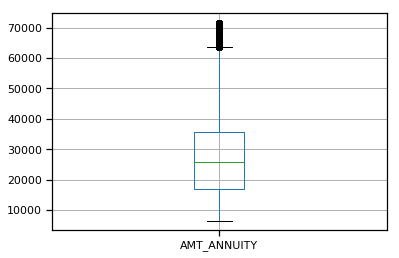

AMT_ANNUITY 10275


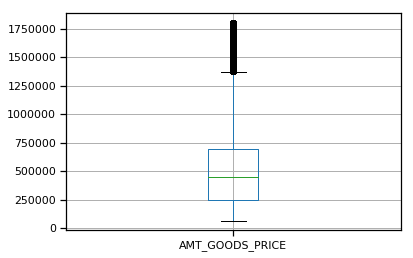

AMT_GOODS_PRICE 578


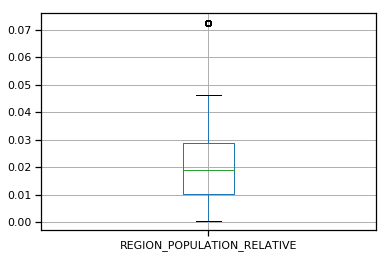

REGION_POPULATION_RELATIVE 80


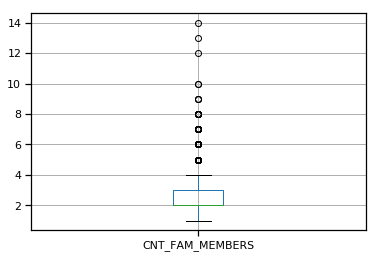

CNT_FAM_MEMBERS 13


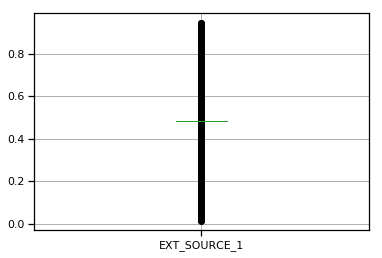

EXT_SOURCE_1 54701


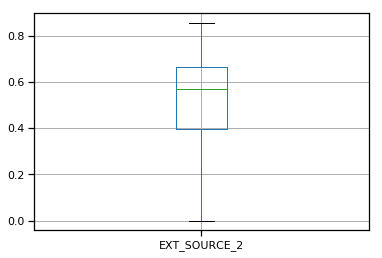

EXT_SOURCE_2 75312


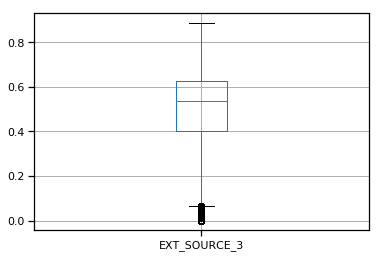

EXT_SOURCE_3 781


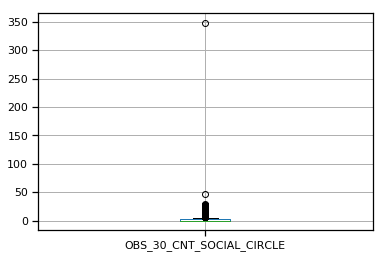

OBS_30_CNT_SOCIAL_CIRCLE 30


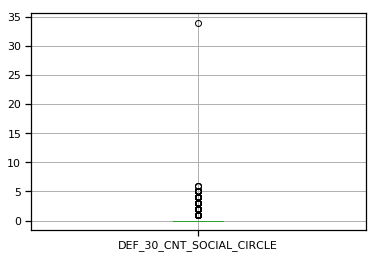

DEF_30_CNT_SOCIAL_CIRCLE 8


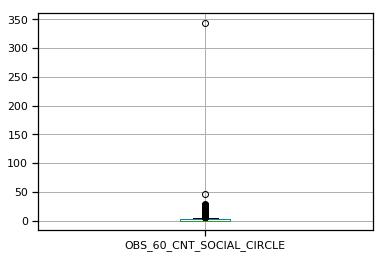

OBS_60_CNT_SOCIAL_CIRCLE 30


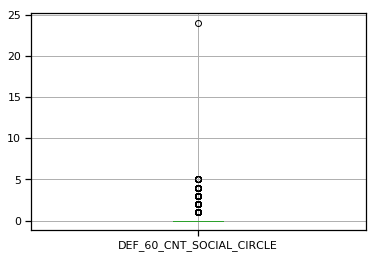

DEF_60_CNT_SOCIAL_CIRCLE 7


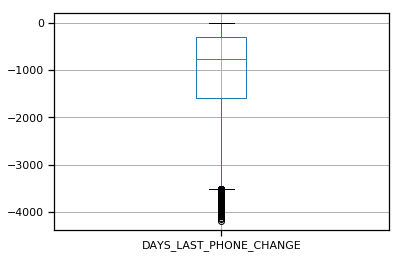

DAYS_LAST_PHONE_CHANGE 3600


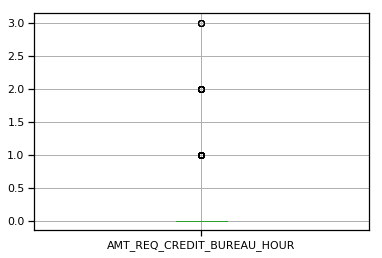

AMT_REQ_CREDIT_BUREAU_HOUR 4


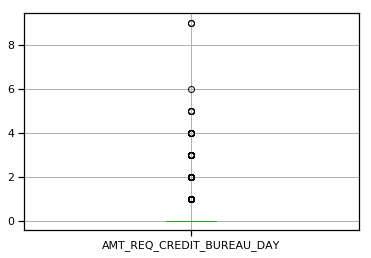

AMT_REQ_CREDIT_BUREAU_DAY 8


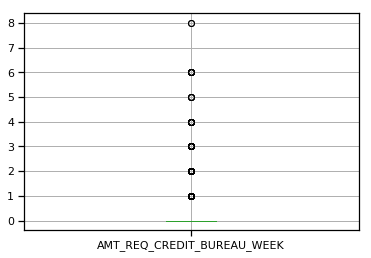

AMT_REQ_CREDIT_BUREAU_WEEK 8


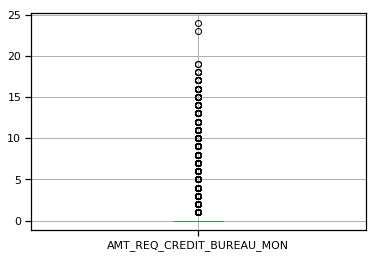

AMT_REQ_CREDIT_BUREAU_MON 22


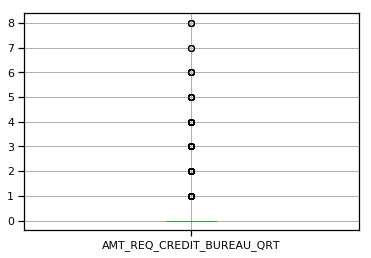

AMT_REQ_CREDIT_BUREAU_QRT 9


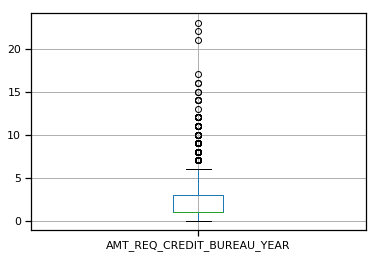

AMT_REQ_CREDIT_BUREAU_YEAR 21


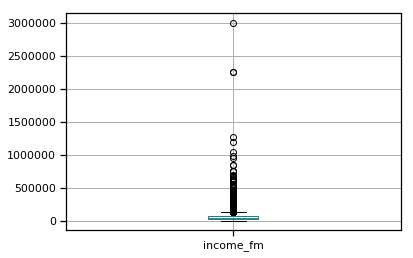

income_fm 1747


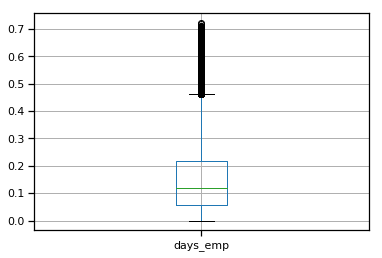

days_emp 121304


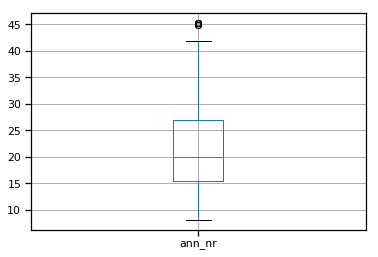

ann_nr 24439


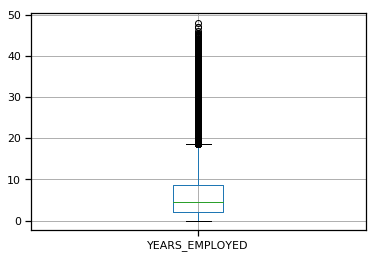

YEARS_EMPLOYED 10836


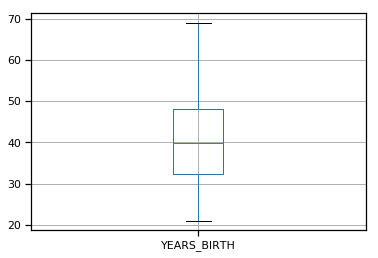

YEARS_BIRTH 15748


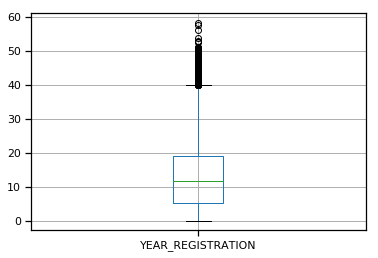

YEAR_REGISTRATION 13396


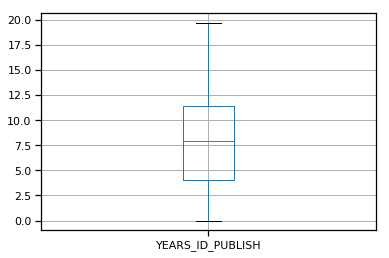

YEARS_ID_PUBLISH 6009


In [94]:
cols=train_df.select_dtypes(include=['float64']).columns.tolist()
floats=[]
for i in cols:
    num_uniq=len(train_df[i].unique().tolist())
    train_df.boxplot(i)
    plt.show()
    print(i,num_uniq)
    floats.append(i)

In [95]:
len(floats)

27

In [96]:
bi_obj=['FLAG_OWN_CAR','FLAG_OWN_REALTY']
for i in bi_obj:
    y=train_df[i].map({'Y': 1,'N':0})
    train_df[i]=y

In [97]:
bi_obj=['FLAG_OWN_CAR','FLAG_OWN_REALTY']
for i in bi_obj:
    y=test_df[i].map({'Y': 1,'N':0})
    test_df[i]=y

In [98]:
objcols=train_df.select_dtypes(include=['object']).columns.tolist()
objcols
# train_df['FLAG_OWN_CAR']

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [99]:
#dummy variables
def getdummies(df):
    t1=df.select_dtypes(include='object')
    t1dummies=pd.get_dummies(t1)
    return t1dummies

In [100]:
train_df_dummies=getdummies(train_df)

len(train_df_dummies)==len(train_df)

True

In [101]:
test_df_dummies=getdummies(test_df)

len(test_df_dummies)==len(test_df)

True

In [102]:
train_df.drop(objcols,axis=1,inplace=True)

In [103]:
test_df.drop(objcols,axis=1,inplace=True)

In [104]:
traindf= pd.concat([train_df,train_df_dummies],axis=1)
traindf.head(5)

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,100002,1,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,0,0,0


In [105]:
testdf= pd.concat([test_df,test_df_dummies],axis=1)

In [106]:
testcols=testdf.columns.tolist()
traincols=traindf.columns.tolist()

In [107]:
testdf.head(1)

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,273889,0,1,0,0,324000.0,675000.0,32602.5,675000.0,0.072508,...,0,0,0,0,0,0,0,0,0,0


the length of columns don't match so therefore we must align them.

In [108]:
traindf, testdf = traindf.align(testdf, join = 'inner', axis = 1)

In [109]:
len(traindf.columns)==len(testdf.columns)
#len(traindf.columns)

True

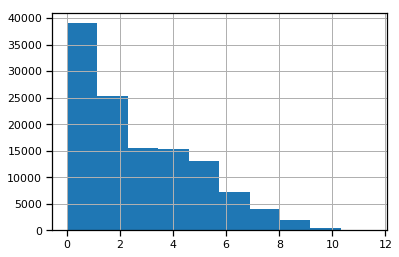

In [110]:
traindf['YEARS_LAST_PHONE_CHANGE'] = traindf['DAYS_LAST_PHONE_CHANGE']/-365
traindf['YEARS_LAST_PHONE_CHANGE'].hist()

In [111]:
testdf['YEARS_LAST_PHONE_CHANGE'] = testdf['DAYS_LAST_PHONE_CHANGE']/-365

In [112]:
traindf.drop('DAYS_LAST_PHONE_CHANGE',axis=1,inplace=True)

In [113]:
testdf.drop('DAYS_LAST_PHONE_CHANGE',axis=1,inplace=True)

In [114]:
#source: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(traindf, 15))

Top Absolute Correlations
NAME_CONTRACT_TYPE_Cash loans          NAME_CONTRACT_TYPE_Revolving loans                   1.000000
CODE_GENDER_F                          CODE_GENDER_M                                        0.999948
OBS_30_CNT_SOCIAL_CIRCLE               OBS_60_CNT_SOCIAL_CIRCLE                             0.998636
AMT_CREDIT                             AMT_GOODS_PRICE                                      0.986069
days_emp                               YEARS_EMPLOYED                                       0.954942
REGION_RATING_CLIENT                   REGION_RATING_CLIENT_W_CITY                          0.951196
CNT_CHILDREN                           CNT_FAM_MEMBERS                                      0.893858
NAME_EDUCATION_TYPE_Higher education   NAME_EDUCATION_TYPE_Secondary / secondary special    0.890212
DEF_30_CNT_SOCIAL_CIRCLE               DEF_60_CNT_SOCIAL_CIRCLE                             0.865298
REG_REGION_NOT_WORK_REGION             LIVE_REGION_NOT_WORK_REGIO

In [115]:
np.corrcoef(traindf.TARGET,traindf['NAME_CONTRACT_TYPE_Cash loans'])

array([[1.        , 0.03756915],
       [0.03756915, 1.        ]])

In [116]:
np.corrcoef(traindf.TARGET,traindf.OBS_30_CNT_SOCIAL_CIRCLE)

array([[1.        , 0.01235626],
       [0.01235626, 1.        ]])

In [117]:
traindf.drop(['OBS_60_CNT_SOCIAL_CIRCLE','NAME_CONTRACT_TYPE_Revolving loans','CODE_GENDER_F'],axis=1,inplace=True)

In [118]:
testdf.drop(['OBS_60_CNT_SOCIAL_CIRCLE','NAME_CONTRACT_TYPE_Revolving loans','CODE_GENDER_F'],axis=1,inplace=True)

In [119]:
floats= traindf.select_dtypes(include=['float64']).columns.tolist()

In [120]:
scaled=traindf[floats]

In [121]:
scaled_test=testdf[floats]

In [122]:
from sklearn import preprocessing

x = scaled.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled = pd.DataFrame(x_scaled,index=traindf.index)

In [123]:
scaled.columns= floats

In [124]:
x = scaled_test.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled_test = pd.DataFrame(x_scaled,index=testdf.index)

In [125]:
scaled_test.columns= floats

In [126]:
ints= traindf.select_dtypes(include=['int64']).columns.tolist()
#ints= ints.remove('SK_ID_CURR')
other= ints[:2]
ints=ints[2:]


In [127]:
df=traindf[other]
df.columns

Index(['SK_ID_CURR', 'TARGET'], dtype='object')

In [128]:
df_test=testdf[other]

In [129]:
scaled_int=traindf[ints]
scaled_int.head(3)

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0,1,0,1,1,0,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,1,1,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0


In [130]:
scaled_int_test=testdf[ints]
scaled_int_test.head(2)

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,1,0,0,1,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [131]:
x = scaled_int.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled_int = pd.DataFrame(x_scaled,index=traindf.index)
scaled_int.columns= ints

C:\Users\umabk\Anaconda2\envs\myenv\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [132]:
x = scaled_int_test.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled_int_test = pd.DataFrame(x_scaled,index=testdf.index)
scaled_int_test.columns= ints

C:\Users\umabk\Anaconda2\envs\myenv\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [133]:
traindf_num=pd.concat([df,scaled_int], axis=1, ignore_index=True)

In [134]:
testdf_num=pd.concat([df_test,scaled_int_test], axis=1, ignore_index=True)

In [135]:
traindf_num.columns = train_df.select_dtypes(include=['int64']).columns.tolist()

In [136]:
testdf_num.columns= testdf.select_dtypes(include=['int64']).columns.tolist()

In [137]:
cols= traindf.select_dtypes(include=['int64']).columns.tolist() + traindf.select_dtypes(include=['float64']).columns.tolist()
#cols

In [138]:
traindf_num=pd.concat([traindf_num,scaled], axis=1, ignore_index=True)
traindf_num.columns=cols
traindf_num.head()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,...,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,income_fm,days_emp,ann_nr,YEARS_EMPLOYED,YEARS_BIRTH,YEAR_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,100002,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.043478,0.032075,0.093005,0.226066,0.036226,0.101860,0.171679,0.294567,0.270968
1,100003,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.000000,0.028318,0.097893,0.756666,0.067659,0.518660,0.055814,0.040434,0.197849
2,100004,0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.000000,0.009536,0.016187,0.321031,0.012722,0.648824,0.200480,0.351674,0.194743
3,100006,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.043478,0.013292,0.221104,0.066983,0.173256,0.646485,0.462751,0.338613,0.147431
4,100007,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.000000,0.018551,0.210744,0.413922,0.173199,0.699384,0.202880,0.480478,0.264277


In [139]:
testdf_num=pd.concat([testdf_num,scaled_test], axis=1, ignore_index=True)
testdf_num.columns=cols
testdf_num.head()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,...,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,income_fm,days_emp,ann_nr,YEARS_EMPLOYED,YEARS_BIRTH,YEAR_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,273889,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.000000,0.052632,0.140069,0.133593,0.340002,0.096006,0.515783,0.175807,0.036822,0.483043
1,273890,0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.000000,0.000000,0.082472,0.089705,0.793614,0.060446,0.456476,0.225144,0.664995,0.000969
2,273891,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.000000,0.105263,0.055683,0.480536,0.697279,0.412029,0.699812,0.540285,0.528831,0.533672
3,273893,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.000000,0.315789,0.055683,0.052481,0.321108,0.029983,0.321023,0.322893,0.713569,0.141715
4,273894,0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.142857,0.052632,0.035591,0.046379,0.031580,0.037419,0.632627,0.260165,0.360232,0.065649


In [140]:
traindf_num.var().sort_values(ascending=True)[:5]

FLAG_MOBIL                  0.000000
FLAG_DOCUMENT_12            0.000008
FLAG_DOCUMENT_10            0.000008
FLAG_DOCUMENT_2             0.000049
OBS_30_CNT_SOCIAL_CIRCLE    0.000052
dtype: float64

In [141]:
traindf_num.drop('FLAG_MOBIL',axis=1, inplace=True)

In [142]:
testdf_num.drop('FLAG_MOBIL',axis=1, inplace=True)

In [143]:
colstoadd=traindf.select_dtypes(include=['uint8']).columns.tolist()
len(colstoadd)

91

In [144]:
traindf_b=traindf[colstoadd]
traindf_final=pd.concat([traindf_num,traindf_b],axis=1)

In [145]:
len(traindf_final.columns)

156

In [146]:
testdf_b=testdf[colstoadd]
testdf_final=pd.concat([testdf_num,testdf_b],axis=1)

In [147]:
len(testdf_final.columns)

156

In [148]:
traindf_final.columns[2:]

Index(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       ...
       'ORGANIZATION_TYPE_Trade: type 3', 'ORGANIZATION_TYPE_Trade: type 4',
       'ORGANIZATION_TYPE_Trade: type 5', 'ORGANIZATION_TYPE_Trade: type 6',
       'ORGANIZATION_TYPE_Trade: type 7',
       'ORGANIZATION_TYPE_Transport: type 1',
       'ORGANIZATION_TYPE_Transport: type 2',
       'ORGANIZATION_TYPE_Transport: type 3',
       'ORGANIZATION_TYPE_Transport: type 4', 'ORGANIZATION_TYPE_University'],
      dtype='object', length=154)

# Feature Selection

In [274]:
X=traindf_final.iloc[:,2:]
y=traindf_final.iloc[:,1]

In [275]:
columnsdf=X.columns

rf=RandomForestClassifier(n_estimators=100)
rf.fit(X, y)
for feature in zip(columnsdf, rf.feature_importances_):
    print(feature)

('FLAG_OWN_CAR', 0.006308033980364277)
('FLAG_OWN_REALTY', 0.006641501533590614)
('CNT_CHILDREN', 0.009716594358385726)
('FLAG_EMP_PHONE', 4.2079494734574544e-05)
('FLAG_WORK_PHONE', 0.006323625104043988)
('FLAG_CONT_MOBILE', 0.0003944927603892079)
('FLAG_PHONE', 0.005685149535168913)
('FLAG_EMAIL', 0.0030446432057766905)
('REGION_RATING_CLIENT', 0.006145804844537853)
('REGION_RATING_CLIENT_W_CITY', 0.006330483637866366)
('HOUR_APPR_PROCESS_START', 0.02810998197325345)
('REG_REGION_NOT_LIVE_REGION', 0.0013407561202859848)
('REG_REGION_NOT_WORK_REGION', 0.0025188031075088326)
('LIVE_REGION_NOT_WORK_REGION', 0.002155732558363646)
('REG_CITY_NOT_LIVE_CITY', 0.0041368584002266775)
('REG_CITY_NOT_WORK_CITY', 0.005596149773988875)
('LIVE_CITY_NOT_WORK_CITY', 0.005582067560138725)
('FLAG_DOCUMENT_2', 9.23974502827264e-05)
('FLAG_DOCUMENT_3', 0.004381953393917073)
('FLAG_DOCUMENT_4', 1.136253986151046e-06)
('FLAG_DOCUMENT_5', 0.0014222297664570143)
('FLAG_DOCUMENT_6', 0.0007196678534960802)
('

In [276]:
features_df= pd.DataFrame(columns=['col','importance'])

features_df.col= columnsdf

features_df.importance=  rf.feature_importances_

In [277]:
features_df.sort_values(by='importance',ascending=False,inplace=True)


features_df.head(15)
#topfeat= features_df.loc[:100,'col'].tolist()

,col,importance
44,EXT_SOURCE_2,0.062635
45,EXT_SOURCE_3,0.055847
58,YEARS_EMPLOYED,0.041448
61,YEARS_ID_PUBLISH,0.041433
59,YEARS_BIRTH,0.041063
60,YEAR_REGISTRATION,0.040835
56,days_emp,0.040231
57,ann_nr,0.039645
39,AMT_ANNUITY,0.037441
62,YEARS_LAST_PHONE_CHANGE,0.037144


In [278]:
topfeat=features_df.col[:15].tolist()

In [279]:
topfeat

['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_EMPLOYED',
 'YEARS_ID_PUBLISH',
 'YEARS_BIRTH',
 'YEAR_REGISTRATION',
 'days_emp',
 'ann_nr',
 'AMT_ANNUITY',
 'YEARS_LAST_PHONE_CHANGE',
 'AMT_CREDIT',
 'income_fm',
 'EXT_SOURCE_1',
 'REGION_POPULATION_RELATIVE',
 'AMT_GOODS_PRICE']

# Model 1

In [281]:
newX=X[['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_ID_PUBLISH',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEAR_REGISTRATION',
 'days_emp',
 'ann_nr',
 'AMT_ANNUITY',
 'YEARS_LAST_PHONE_CHANGE',
 'AMT_CREDIT',
 'income_fm',
 'EXT_SOURCE_1',
 'REGION_POPULATION_RELATIVE',
 'AMT_GOODS_PRICE']]
rf=RandomForestClassifier(n_estimators=500)
rf.fit(newX, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [282]:
from sklearn import metrics

X_test=testdf_final.loc[:,topfeat]
y_test=testdf_final.iloc[:,1]


pred_test=rf.predict(X_test)
acc_score = metrics.accuracy_score(y_test,pred_test)
f=metrics.f1_score(y_test,pred_test)

print(acc_score,f)

0.9152062384568028 0.017126546146527116


In [283]:
metrics.confusion_matrix(y_test,pred_test)

array([[22281,    23],
       [ 2043,    18]], dtype=int64)

# Feature Selection 2

## PCA

In [157]:
train_df_new = traindf[['AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3','days_emp','income_fm','ann_nr'  ]]
y=  traindf['TARGET']

In [158]:
test_df_new = testdf[['AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3','days_emp','income_fm','ann_nr' ]]
y_test=  testdf['TARGET']

In [159]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA()
standard_scaler = StandardScaler() 
train_scaled = standard_scaler.fit_transform(train_df_new.fillna(-1))
pca.fit(train_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [160]:
pca.explained_variance_

array([3.58385839, 1.50088519, 1.23770528, 0.93004964, 0.89990619,
       0.83371117, 0.74651064, 0.20376145, 0.05210858, 0.01158553])

In [161]:
transformed = pca.transform(train_scaled)
ans = pd.DataFrame(transformed, columns = ['pca_1','pca_2','pca_3','pca_4','pca_5','pca_6','pca_7','pca_8','pca_9','pca_10'])
ans['TARGET'] =traindf_final['TARGET'].tolist()
print('the train dataframe has the shape of: {}'.format(transformed.shape))

the train dataframe has the shape of: (121880, 10)


In [162]:
test_scaled = standard_scaler.fit_transform(test_df_new.fillna(-1))
pca.fit(test_scaled)

transformed2 = pca.transform(test_scaled)
ans_test = pd.DataFrame(transformed2, columns = ['pca_1','pca_2','pca_3','pca_4','pca_5','pca_6','pca_7','pca_8','pca_9','pca_10'])
ans_test['TARGET'] =testdf_final['TARGET'].tolist()
print('the test dataframe has the shape of: {}'.format(transformed2.shape))

the test dataframe has the shape of: (24365, 10)


# Model 2

In [188]:
X=ans.iloc[:,:9]
y=ans.loc[:,'TARGET']

X_test=ans_test.iloc[:,:9]
y_test=ans_test.loc[:,'TARGET']


In [189]:
clf = KNeighborsClassifier(n_neighbors=1, weights='distance')

In [190]:
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='distance')

In [191]:
r=clf.predict(X_test)

In [192]:
metrics.f1_score(y_test,r)

0.13074819786229183

In [193]:
metrics.confusion_matrix(y_test,r)

array([[20605,  1699],
       [ 1798,   263]], dtype=int64)

# Model 3

In [197]:
from xgboost import XGBClassifier

In [241]:

X_train, X_test, y_train, y_test = train_test_split( traindf_final.drop(['TARGET','SK_ID_CURR'],axis=1) , traindf_final['TARGET'] , test_size=0.2, random_state=42)
model = XGBClassifier(max_depth=20, learning_rate=0.1,n_estimators=100,n_jobs=30,scale_pos_weight=4,missing=np.nan,gamma=16, eval_metric="auc",reg_lambda=40,reg_alpha=40)
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='auc', gamma=16, learning_rate=0.1,
       max_delta_step=0, max_depth=20, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=30, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=40,
       reg_lambda=40, scale_pos_weight=4, seed=None, silent=True,
       subsample=1)

In [242]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print("Train Accuracy %.4f" % accuracy_score(y_train,y_train_pred))
print("Test Accuracy %.4f" % accuracy_score(y_test,y_test_pred))

Train Accuracy 0.8824
Test Accuracy 0.8702


In [243]:
X_test=testdf_final.iloc[:,2:]
y_test=testdf_final.iloc[:,1]


In [244]:
y_test_pred = model.predict(X_test)

In [245]:
print("Test Accuracy %.4f" % accuracy_score(y_test,y_test_pred))

Test Accuracy 0.8800


In [246]:
confmat=confusion_matrix(y_test,y_test_pred)
print(confmat)

[[20868  1436]
 [ 1489   572]]


# Model 4

In [247]:
X=ans.iloc[:,:9]
y=ans.loc[:,'TARGET']

X_test=ans_test.iloc[:,:9]
y_test=ans_test.loc[:,'TARGET']


In [248]:
model.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='auc', gamma=16, learning_rate=0.1,
       max_delta_step=0, max_depth=20, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=30, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=40,
       reg_lambda=40, scale_pos_weight=4, seed=None, silent=True,
       subsample=1)

In [249]:
y_test_pred = model.predict(X_test)

In [250]:
print("Test Accuracy %.4f" % accuracy_score(y_test,y_test_pred))

Test Accuracy 0.8770


In [251]:
confmat=confusion_matrix(y_test,y_test_pred)
print(confmat)

[[20886  1418]
 [ 1578   483]]


# Model 5

In [252]:
train_df_new = traindf[['AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3','days_emp','income_fm','ann_nr'  ]]
y=  traindf['TARGET']

In [253]:
test_df_new = testdf[['AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3','days_emp','income_fm','ann_nr'  ]]
y_test=  testdf['TARGET']

In [254]:
model.fit(train_df_new,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='auc', gamma=16, learning_rate=0.1,
       max_delta_step=0, max_depth=20, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=30, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=40,
       reg_lambda=40, scale_pos_weight=4, seed=None, silent=True,
       subsample=1)

In [255]:
y_test_pred = model.predict(test_df_new )

In [256]:
print("Test Accuracy %.4f" % accuracy_score(y_test,y_test_pred))

Test Accuracy 0.8737


In [257]:
confmat=confusion_matrix(y_test,y_test_pred)
print(confmat)

[[20659  1645]
 [ 1433   628]]


# Model 6

In [284]:
listdf=[dataframe_file0,dataframe_file1,dataframe_file2,dataframe_file3,dataframe_file4]
train_df= pd.concat( listdf,axis=0)
train_df=train_df.iloc[:,1:]
test_df= pd.read_csv('application_train5.csv')
test_df=test_df.iloc[:,1:]

In [285]:
train_df=train_df[train_df.AMT_INCOME_TOTAL!=117000000.0]

In [286]:
# train_df.loc[train_df.DAYS_EMPLOYED>0,DAYS_EMPLOYED]
train_df.loc[train_df.DAYS_EMPLOYED>0,'DAYS_EMPLOYED'] = np.nan

In [287]:
train_df['income_fm']= train_df['AMT_INCOME_TOTAL']/(train_df['CNT_FAM_MEMBERS']+1)
test_df['income_fm']= test_df['AMT_INCOME_TOTAL']/(test_df['CNT_FAM_MEMBERS']+1)

train_df['days_emp']= train_df['DAYS_EMPLOYED']/train_df['DAYS_BIRTH']
test_df['days_emp']= test_df['DAYS_EMPLOYED']/test_df['DAYS_BIRTH']


train_df['ann_nr'] = train_df['AMT_CREDIT']/train_df['AMT_ANNUITY']
test_df['ann_nr'] = test_df['AMT_CREDIT']/test_df['AMT_ANNUITY']

In [300]:
X=train_df[['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_ID_PUBLISH',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'days_emp',
 'ann_nr',
 'AMT_ANNUITY',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_CREDIT',
 'income_fm',
 'EXT_SOURCE_1',
 'REGION_POPULATION_RELATIVE',
 'AMT_GOODS_PRICE']]

y=train_df['TARGET']

In [303]:
X_test=test_df[['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_ID_PUBLISH',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'days_emp',
 'ann_nr',
 'AMT_ANNUITY',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_CREDIT',
 'income_fm',
 'EXT_SOURCE_1',
 'REGION_POPULATION_RELATIVE',
 'AMT_GOODS_PRICE']]

y_test=test_df['TARGET']

In [302]:
model = XGBClassifier(max_depth=20, learning_rate=0.1,n_estimators=100,n_jobs=30,scale_pos_weight=4,missing=np.nan,gamma=16, eval_metric="auc",reg_lambda=40,reg_alpha=40)
model.fit(X,y)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='auc', gamma=16, learning_rate=0.1,
       max_delta_step=0, max_depth=20, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=30, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=40,
       reg_lambda=40, scale_pos_weight=4, seed=None, silent=True,
       subsample=1)

In [304]:
y_test_pred = model.predict(X_test )

In [306]:
print("Test Accuracy %.4f" % accuracy_score(y_test,y_test_pred))

Test Accuracy 0.8829


In [305]:
confmat=confusion_matrix(y_test,y_test_pred)
print(confmat)

[[25797  1820]
 [ 1694   689]]
